In [17]:
import pandas as pd
import shapely.geometry as geom
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import mapping
from shapely.geometry import Polygon
import rasterio
from rasterio.mask import mask
import numpy as np
from PIL import Image
import os
from affine import Affine
%matplotlib inline

In [18]:
pics = gpd.read_file("pictures/pictures.shp")
fields = gpd.read_file("Crops_2016/Crops_2016_26910.shp")

In [19]:
pic1= pics.iloc[0]["geometry"]
def container(x):
    """This function applies the contain function which 
    determins if the coordinates of crop field are in a photo
    """
    return(pic1.intersects(x))
intersect_fields = fields[fields['geometry'].apply(container)]

In [39]:
intersect_fields

,OBJECTID,county_num,pk_site_id,site_id,pk_permit_,permit_num,permittee,permit_yr,p_eff_date,p_exp_date,...,loc_narr,is_active,size,size_units,crop_list,calc_acres,mtrs,hq_distric,site_distr,geometry
368,2965866,57,7052472,MEB1,821762,0600132,"DOHERTY FARMS, SEAN V",2016,2016-01-01,2016-12-31,...,None,1,150.0,ACRES,RICE,153.963105,M12N01E07,57,None,"POLYGON ((594157.8389296099 4306597.819774477,..."
369,2966432,57,7052473,MEB2,821762,0600132,"DOHERTY FARMS, SEAN V",2016,2016-01-01,2016-12-31,...,None,1,142.0,ACRES,"RICE, UNCULTIVATED AG",142.148621,M12N01E07,57,None,"POLYGON ((594997.2041008542 4306590.487026623,..."
370,2965867,57,7052474,MEB3,821762,0600132,"DOHERTY FARMS, SEAN V",2016,2016-01-01,2016-12-31,...,None,1,172.0,ACRES,"WHEAT, UNCULTIVATED AG",169.758193,M12N01E18,57,None,"POLYGON ((594186.760732623 4305812.927382926, ..."
371,2966644,57,7052475,MEB4,821762,0600132,"DOHERTY FARMS, SEAN V",2016,2016-01-01,2016-12-31,...,None,1,165.0,ACRES,RICE,168.150377,M12N01E18,57,None,"POLYGON ((594195.6345087466 4305368.504002058,..."
372,2967427,57,7052476,MEB5,821762,0600132,"DOHERTY FARMS, SEAN V",2016,2016-01-01,2016-12-31,...,None,1,166.0,ACRES,"SUNFLOWER SEED, UNCULTIVATED AG",169.898060,M12N01E18,57,None,"POLYGON ((594217.0236612433 4304505.795926595,..."
575,3037524,57,7066366,JM2,822649,0600033,T & P FARMS,2016,2016-01-01,2016-12-31,...,None,1,75.0,ACRES,"ALFALFA, UNCULTIVATED AG",74.467487,M12N01W23,None,None,"POLYGON ((591748.0220602599 4303377.629205205,..."
598,3039338,57,7066390,ER55C2,822649,0600033,T & P FARMS,2016,2016-01-01,2016-12-31,...,None,1,120.0,ACRES,UNCULTIVATED AG,111.843628,M12N01E17,None,None,"POLYGON ((597022.2861618041 4305774.277576103,..."
757,3074879,57,7078375,A69,823620,570367A,"VOELZ FARMING, S B",2016,2016-05-06,2016-12-31,...,AULMAN HOLDING,1,69.0,ACRES,"RICE, UNCULTIVATED AG",78.414884,M12N01E05,57,None,"POLYGON ((596200.8848445944 4308244.32122751, ..."
760,3117074,57,7078384,G220,823620,570367A,"VOELZ FARMING, S B",2016,2016-05-06,2016-12-31,...,SYCAMORE SLOUGH,1,110.0,ACRES,"RICE, UNCULTIVATED AG",115.275857,M12N01E06,57,None,"POLYGON ((596212.6821828793 4308635.00154531, ..."
811,3107816,57,7082228,A217W,823859,0600712,REHMAN FAMILY FARMS,2016,2016-01-01,2016-12-31,...,None,1,179.0,ACRES,RICE,182.358511,M12N01E21,06,None,"POLYGON ((597458.1170806191 4304487.591974311,..."


In [9]:
geoms = intersect_fields.geometry.values
field1 =geoms[0]
json_geoms = [mapping(field1)]

In [5]:
#Crops image
with rasterio.open("D:\\NAIP GEOTIFF\\m_3812101_se_10_h_20160711\\m_3812101_se_10_h_20160711.tif", 'r') as src:
    out_image, out_transform = mask(src, json_geoms, crop = True)

In [14]:
out_image.shape[1]*out_image.shape[2]*0.36

634780.7999999999

In [11]:
geoms[0].area

622706.401555776

In [45]:
x = np.swapaxes(out_image.data.transpose(),0,1)
img = Image.fromarray(x, 'RGBA')

In [46]:
src = rasterio.open("D:\\NAIP GEOTIFF\\m_3812101_se_10_h_20160711\\m_3812101_se_10_h_20160711.tif", 'r')

In [47]:
a = src.profile

In [50]:
geoms[0].bounds

(594157.8389296099, 4305840.159636106, 594994.3100869744, 4306597.819774477)

In [51]:
src.affine[0]

0.6

In [52]:
aff = Affine(src.affine[0], src.affine[1], geoms[0].bounds[0], src.affine[3], src.affine[4], geoms[0].bounds[3])
trans = (geoms[0].bounds[0], src.transform[1], src.transform[2],geoms[0].bounds[3], src.transform[4], src.transform[5] )

C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [53]:
a.update({'height': out_image.shape[1], 'width': out_image.shape[2], 'crs':'epsg:26910', 'affine':aff, 'transform':trans })

In [55]:
b = rasterio.open('p.tif', 'w', **a)

C:\Users\marce\Anaconda3\lib\site-packages\rasterio\__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


In [56]:
b.write(out_image)

In [57]:
b.close()

In [58]:
x = rasterio.open('p.tif')

In [59]:
x.bounds

BoundingBox(left=594157.8389296099, bottom=4305839.419774476, right=594994.8389296099, top=4306597.819774477)

In [60]:
x.close()

C:\Users\marce\Anaconda3\lib\site-packages\PIL\Image.py:2514: DecompressionBombWarning: Image size (118146000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


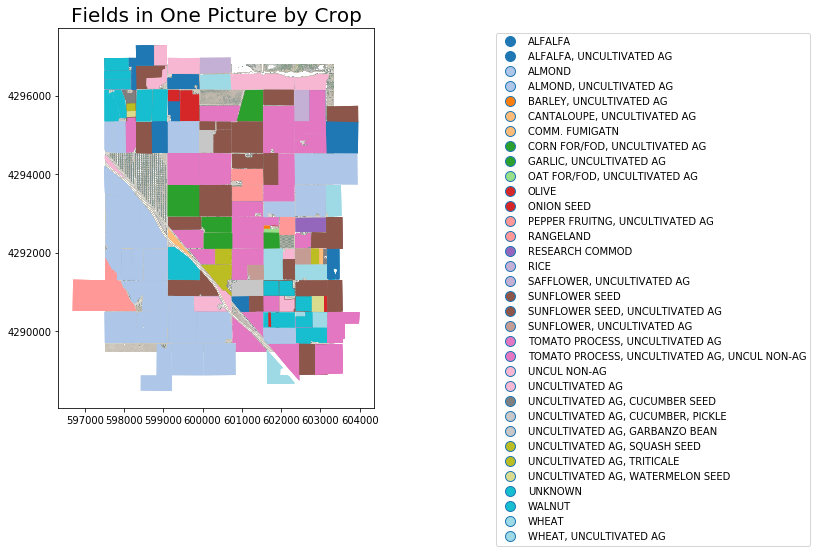

In [5]:
def plot_field(num = 0):
    path = 'D:\\NAIP GEOTIFF'
    pic_path = os.path.join(os.path.join(path, pics.iloc[num]['name'].replace('.tif', '')),pics.iloc[num]['name'] )
    def container(x):
        return(pics.iloc[num]['geometry'].intersects(x))
    intersect_fields = fields[fields['geometry'].apply(container)]
    fig, ax = plt.subplots(1, figsize=(7,7))
    plt.imshow(plt.imread(pic_path), extent= (pics.iloc[num]['geometry'].bounds[0],pics.iloc[num]['geometry'].bounds[2],pics.iloc[num]['geometry'].bounds[1],pics.iloc[num]['geometry'].bounds[3] ))
    intersect_fields.plot(ax = ax, column = 'crop_list',cmap = 'tab20',legend = True)
    l=ax.get_legend()
    l.set_bbox_to_anchor((1.5, 1, .9, 0))
    ax.set_title("Fields in One Picture by Crop", fontsize = 20)
plot_field(12)

In [ ]:
#This Function will crop all pictures and make files
path = 'D:/NAIP GEOTIFF'
for pic in pics:
    pic_path = os.path.join(path,pic['name'] )
    def container(x):
        return(pic['geometry'].intersects(x))
    intersect_fields = fields[fields['geometry'].apply(container)]
    for i in range(len(intersect_fields)):
        new_geoms = [mapping(intersect_fields.iloc[i].geometry)]
        with rasterio.open(pic_path) as src:
            out_image, out_transform = mask(src, new_geoms, crop = True)
            if(out_image.shape[1]*out_image.shape[2]*0.6**2 >= .5*intersect_fields.iloc[i]["geometry"].area):
                a = src.profile
                aff = Affine(src.affine[0], src.affine[1], intersect_fields.iloc[i]['geometry'].bounds[0], src.affine[3], src.affine[4], geoms[0].bounds[3])
                trans = (intersect_fields.iloc[i]['geometry'].bounds[0], src.transform[1], src.transform[2],intersect_fields.iloc[i]['geometry'].bounds[3], src.transform[4], src.transform[5] )
                a.update({'height': out_image.shape[1], 'width': out_image.shape[2], 'crs':'epsg:26910', 'affine':aff, 'transform':trans })     
                new_pic_path = os.path.join(path,pic['name'].replace('.tif','') +'_'+ str(intersect_fields.iloc[i]["OBJECTID"])+'.tif')
                with rasterio.open(new_pic_path, 'w', **a) as dst:
                    dst.write(out_image)
                dst.close()

In [43]:
path = 'D:\\NAIP GEOTIFF'
pic_path = os.path.join(os.path.join(path, pics.iloc[0]['name'].replace('.tif', '')),pics.iloc[0]['name'] )
for i in range(len(intersect_fields)):
    new_geoms = [mapping(intersect_fields.iloc[i].geometry)]
    with rasterio.open(pic_path) as src:
        out_image, out_transform = mask(src, new_geoms, crop = True)
        if(out_image.shape[1]*out_image.shape[2]*0.6**2 > .5*intersect_fields.iloc[i]["geometry"].area):
            a = src.profile
            aff = Affine(src.affine[0], src.affine[1], intersect_fields.iloc[i]['geometry'].bounds[0], src.affine[3], src.affine[4], geoms[0].bounds[3])
            trans = (intersect_fields.iloc[i]['geometry'].bounds[0], src.transform[1], src.transform[2],intersect_fields.iloc[i]['geometry'].bounds[3], src.transform[4], src.transform[5] )
            a.update({'height': out_image.shape[1], 'width': out_image.shape[2], 'crs':'epsg:26910', 'affine':aff, 'transform':trans })     
            new_pic_path = os.path.join(path,pics.iloc[0]['name'].replace('.tif','') +'_'+ str(intersect_fields.iloc[i]["OBJECTID"])+'.tif')
            with rasterio.open(new_pic_path, 'w', **a) as dst:
                dst.write(out_image)
            dst.close()

C:\Users\marce\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\marce\Anaconda3\lib\site-packages\rasterio\__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)


In [44]:
for pic in pics:
    print(pics)

        date                            name  \
0   20160711  m_3812101_se_10_h_20160711.tif   
1   20160711  m_3812101_sw_10_h_20160711.tif   
2   20160711  m_3812102_se_10_h_20160711.tif   
3   20140726  m_3812102_sw_10_1_20140726.tif   
4   20160711  m_3812102_sw_10_h_20160711.tif   
5   20160711  m_3812109_ne_10_h_20160711.tif   
6   20160711  m_3812109_nw_10_h_20160711.tif   
7   20160711  m_3812109_se_10_h_20160711.tif   
8   20160711  m_3812109_sw_10_h_20160711.tif   
9   20160711  m_3812110_ne_10_h_20160711.tif   
10  20160711  m_3812110_nw_10_h_20160711.tif   
11  20160711  m_3812110_se_10_h_20160711.tif   
12  20160711  m_3812110_sw_10_h_20160711.tif   
13  20160710  m_3812111_nw_10_h_20160710.tif   
14  20160710  m_3812111_se_10_h_20160710.tif   
15  20160710  m_3812111_sw_10_h_20160710.tif   
16  20140726  m_3812117_ne_10_1_20140726.tif   
17  20160711  m_3812117_ne_10_h_20160711.tif   
18  20140726  m_3812117_nw_10_1_20140726.tif   
19  20160711  m_3812117_nw_10_h_20160711